In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
#library that contains punctuation
import string
from wordcloud import WordCloud
import spacy
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
print("SpaCy version: {}".format(spacy.__version__))
print("nltk version: {}".format(nltk.__version__))
import time
from nltk import ngrams
import scattertext as st

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


SpaCy version: 3.2.1
nltk version: 3.6.7


## Initial Exploration on train.csv

In [ ]:
# Loading the train.csv into a dataframe
train = pd.read_csv('./content/train.csv')

In [7]:
# Displaying first 5 rows of the dataframe
train.head()

,Score,Review_text
0,5,I received this product early from the seller!...
1,5,*****<br />Numi's Collection Assortment Melang...
2,5,"I was very careful not to overcook this pasta,..."
3,5,Buying this multi-pack I was misled by the pic...
4,5,These bars are so good! I loved them warmed up...


In [8]:
# Displaying the information on the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426340 entries, 0 to 426339
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Score        426340 non-null  int64 
 1   Review_text  426340 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.5+ MB


In [9]:
# Displaying the summary statistics of the dataframe
train.describe()

,Score
count,426340.000000
mean,4.180928
std,1.312447
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# Getting the first row of the dataframe
train.loc[0]

Score                                                          5
Review_text    I received this product early from the seller!...
Name: 0, dtype: object

In [11]:
# Getting the first review of "Review_text" in the dataframe
train.loc[0,'Review_text']

'I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon. Very Good'

In [12]:
# Getting the second row of the dataframe
train.loc[1]

Score                                                          5
Review_text    *****<br />Numi's Collection Assortment Melang...
Name: 1, dtype: object

In [ ]:
# Getting the second review of "Review_text" in the dataframe
train.loc[1,'Review_text']

'*****<br />Numi\'s Collection Assortment Melange includes:<br />5 Herbal Teas (caffeine-free, also called "teasans"):<br />* Dry Desert Lime: Lime Herbal Teasan<br />* Fields of Gold: Lemongrass Herbal Teasan<br />* Red Mellow Bush: Rooibos Herbal Teasan<br />* Bushmen\'s Brew: Honeybush Herbal Teasan<br />* Simply Mint: Moroccan Mint<br /><br />2 Green Teas (lower in caffeine):<br />* Temple of Heaven: Gunpowder Green Tea<br />* Monkey King: Jasmine Green Tea<br /><br />2 Black Teas (contain caffeine):<br />* Chinese Breakfast: Yunnan Black Tea<br />* Smoky Tarry: Lapsang Souchong Black Tea<br /><br />This is a total of nine different teas, two tea bags of each one in each box. Numi teas are known for their high-quality, organic and kosher ingredients, and in my opinion, are some of the tastiest and best teas I have ever tried. They do not include artificial ingredients or flavorings.<br /><br />On the box, the manufacturer writes: "From mist-covered mountains to sun-drenched deserts

In [38]:
# Displaying the grouping of the train data by score
train.groupby('Score').describe()

Review_text                                                             \
            count  unique                                                top   
Score                                                                          
1           39391   28612  This review will make me sound really stupid, ...   
2           22438   16391  I only used two maybe three tea bags and got p...   
3           31938   23284  When I bought the first box I had a cup of tea...   
4           60449   43971  Stash Chamomile Herbal Tea is tea bags with dr...   
5          272124  196676  The pet food industry can be one of the most i...   

            
      freq  
Score       
1      152  
2       22  
3       22  
4       27  
5       33

### Summary :
* ##### Count: Number of reviews that have a particular score (Eg: Score 1 attributes to 39391 reviews)
* ##### Unique: Number of unique reviews that have a particular score (Eg: Score 1 attributes to 28612 reviews)
* ##### Top: Most frequent review
* ##### Freq: Frequency of the top review

## Initial Exploration on test.csv

In [3]:
# Loading the test.csv into a dataframe
train = pd.read_csv('./content/train.csv')

# Loading the test.csv into a dataframe
test = pd.read_csv('./content/test.csv')

In [16]:
# Displaying first 5 rows of the dataframe
test.head()

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...


In [18]:
# Displaying the information on the dataframe
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142114 entries, 0 to 142113
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Review_text  142114 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [19]:
# Displaying the summary statistics of the dataframe
test.describe()

,Review_text
count,142114
unique,119898
top,"This review will make me sound really stupid, ..."
freq,47


In [21]:
# Getting the first row of the dataframe
test.loc[0]

Review_text    This is a good tasting K-cup from a guy who dr...
Name: 0, dtype: object

In [22]:
# Getting the first review of "Review_text" in the dataframe
test.loc[0,'Review_text']

'I received this product early from the seller! They are a very tastey & a Great mid-day snack. I have shared them with my Glutten Free Friends & they will be ordering this product & more very soon. Very Good'

In [23]:
# Getting the second row of the dataframe
test.loc[1]

Review_text    these are a wonderful light crunchy breadstick...
Name: 1, dtype: object

In [24]:
# Getting the second review of "Review_text" in the dataframe
test.loc[1,'Review_text']

'these are a wonderful light crunchy breadstick. that have a superior flavor and texture. I can eat these a box at a time'

# Visualisation on both dataframes

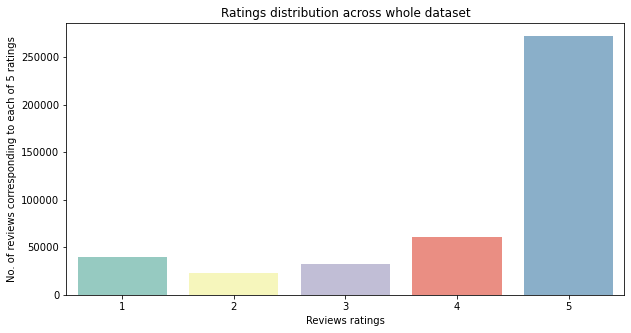

In [36]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Score',data=train,palette='Set3')
#sns.countplot()
plt.title('Ratings distribution across whole dataset')
plt.xlabel('Reviews ratings')
plt.ylabel("No. of reviews corresponding to each of 5 ratings")
plt.show()

In [49]:
# Creating a new column 'length' that contains the length of each review (for visualization)
train['Length'] = train['Review_text'].apply(len)

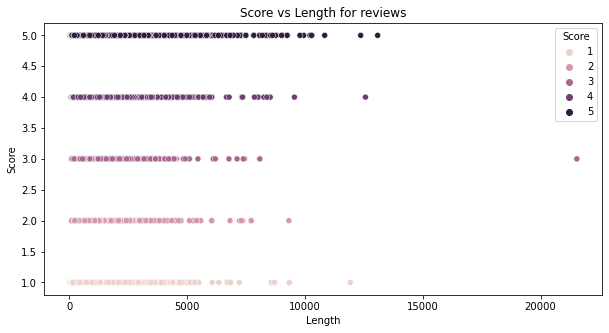

In [51]:
# Visualizing how the length and score of each review is related to one another.

# x="Lengt
plt.figure(figsize=(10,5))
sns.scatterplot(data=train, x="Length", y="Score", hue="Score").set(title = "Score vs Length for reviews")
plt.show()

### Observations:

We notice few outliers in each of the categories (score) but the most prominent one is the review with Score 3.

TODO: 
View the outliers|

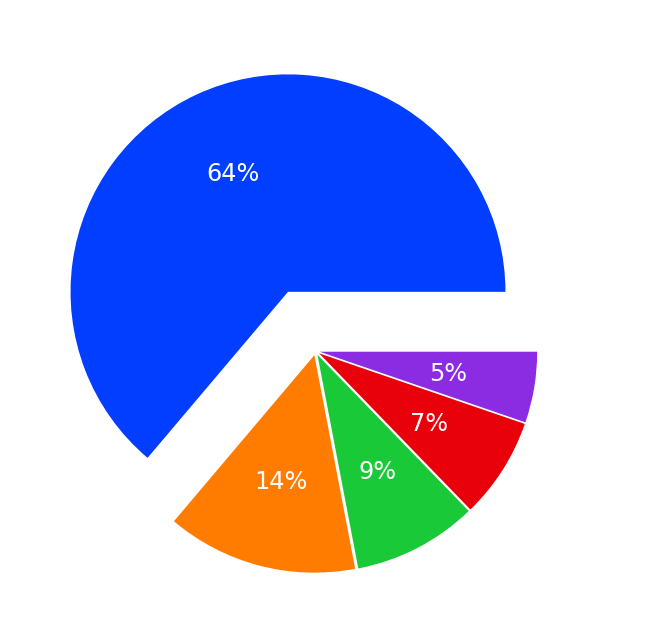

In [56]:
# Creating labels for Pie Plot
labels_num = train["Score"].value_counts().index.tolist()

labels = []
for i in labels_num:
    labels.append(f"Score: {i}")

# Setting color scheme for the pie plot
colors = sns.color_palette('bright')

# For adding highting to the most dense review count
explode = [0.3,0.02,0.02,0.02,0.02]

# Plotting the pie chart
plt.figure(figsize=(20,10))
plt.title("Pie Plot to show Proportion of each Score", pad=50, fontsize=30, color= 'white')
plt.pie(train["Score"].value_counts(),colors = colors, labels = labels, autopct = '%0.0f%%', explode = explode, textprops={'fontsize': 24, 'color': 'white'})
plt.show()

### Observations:
* Score 5 has the largest target distribution (by 64%) across all movie reviews.
* Score 2 has the lowest target distribution (by 5%) across all movie reviews.

<AxesSubplot:xlabel='Score', ylabel='count'>

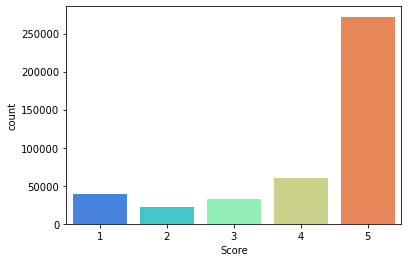

In [71]:
# Count plot for grouping each review by score
sns.countplot(x='Score',data=train ,palette='rainbow')

In [73]:
# Function for automatically generating word clouds based on the word and text provided
def generate_word_cloud(word,text):
    wordcloud = WordCloud(
        background_color='white',
        width = 3000,
        height = 2000).generate(str(word))
    fig = plt.figure(
        figsize = (15, 12),
        facecolor = 'k',
        edgecolor = 'k')
    plt.title(text, color="white", fontsize=30, pad=20)
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
# https://www.kaggle.com/sonalisingh1411/nlp-part-1-amazon-fine-food-sentiment-analysis

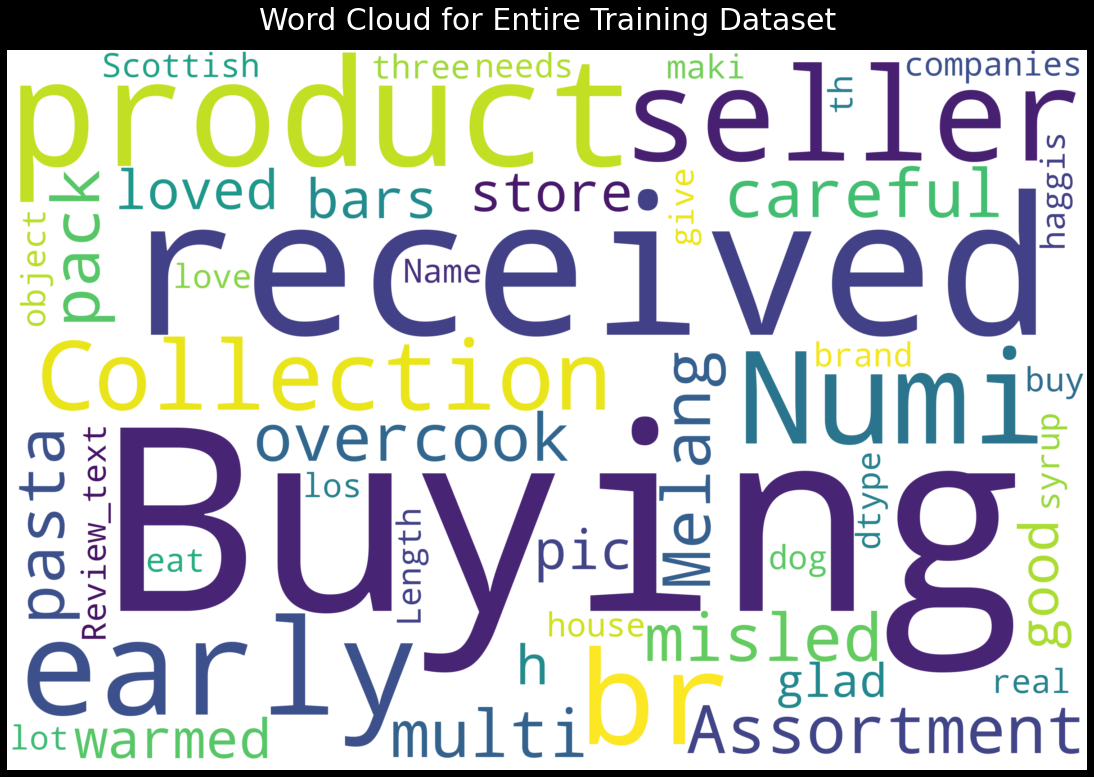

In [74]:
texts = train['Review_text']
generate_word_cloud(texts,"Word Cloud for Entire Training Dataset")

# WordClouds for Each Score





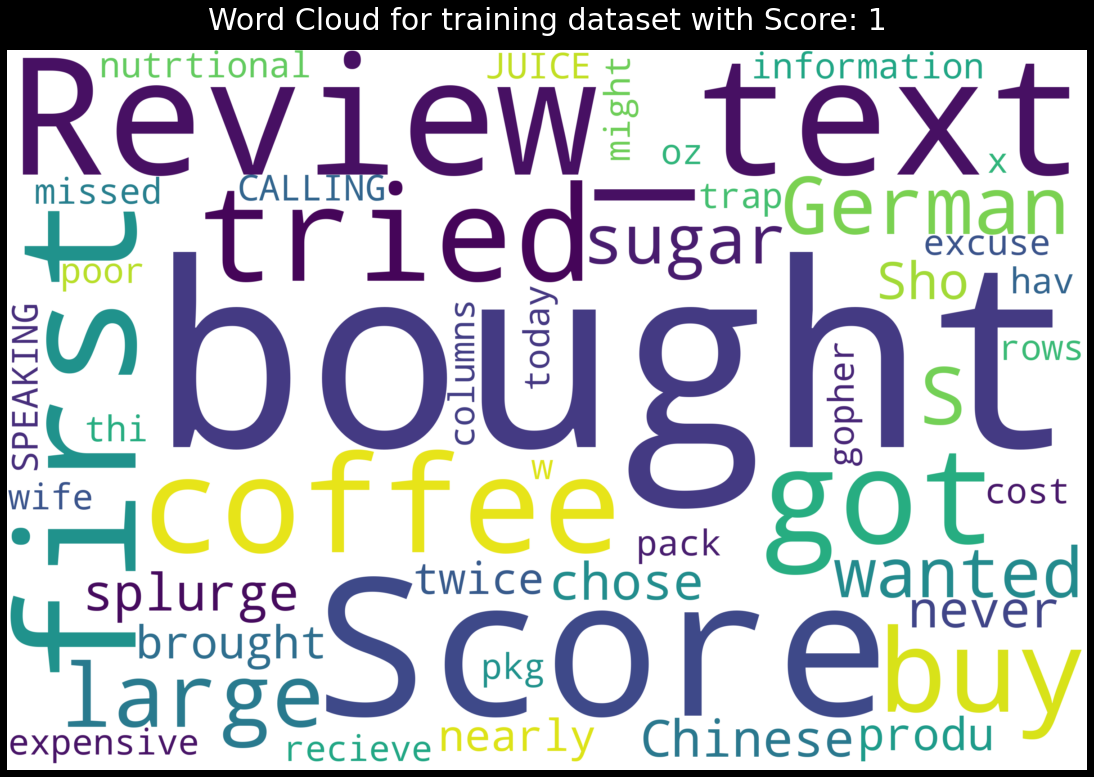

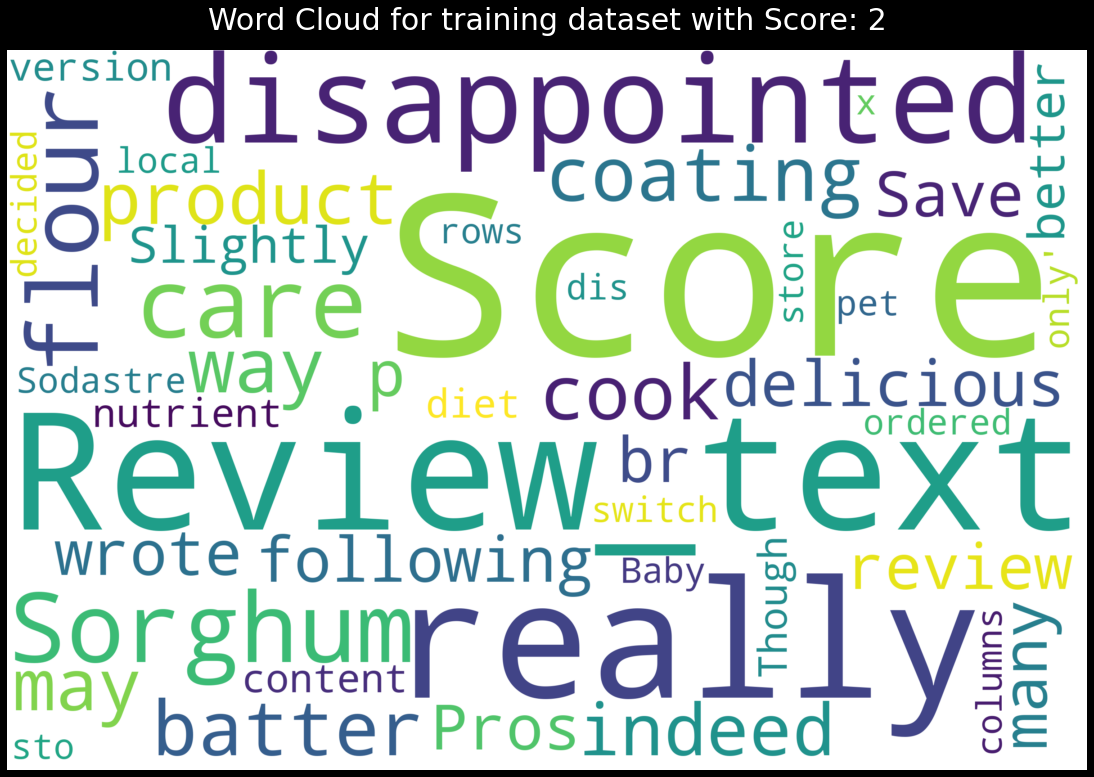

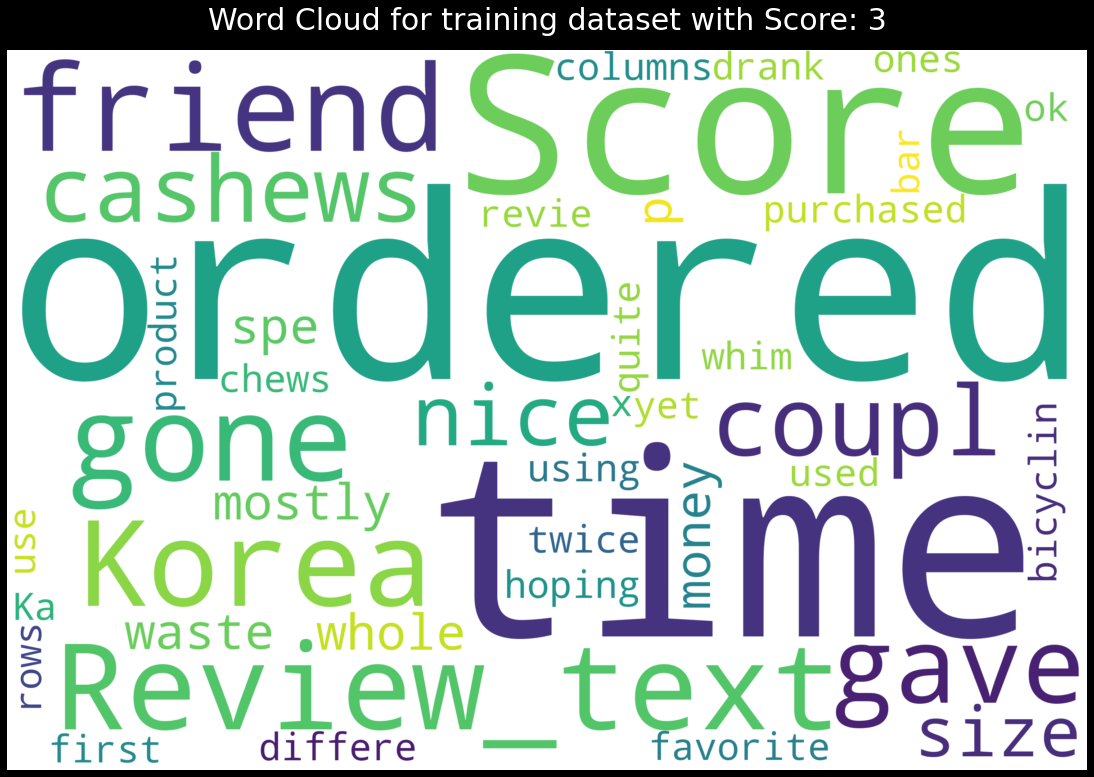

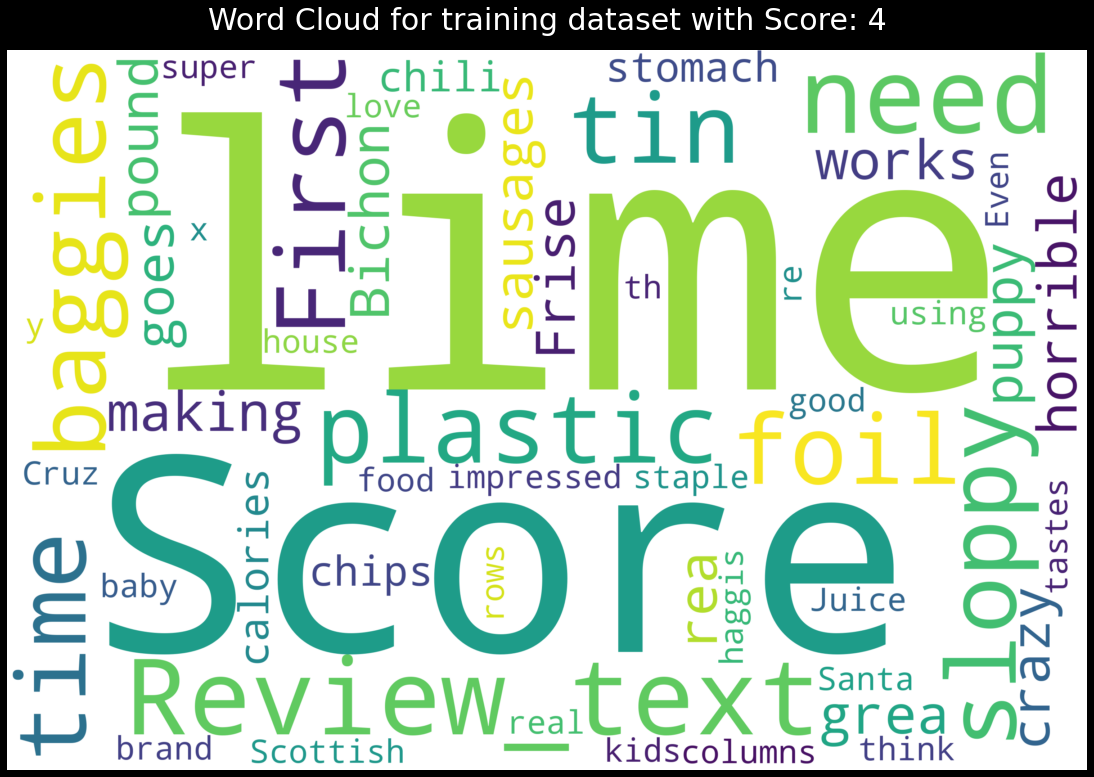

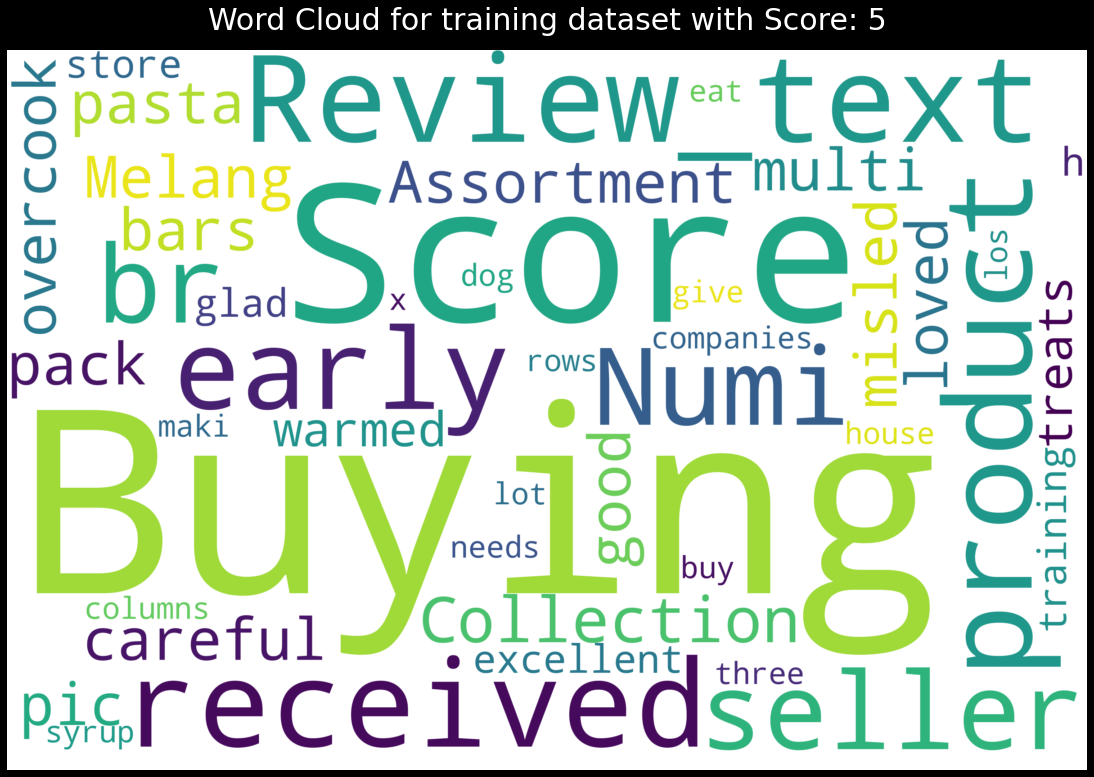

In [91]:
for i in range(5):
    df = train[train["Score"] == i+1]
    generate_word_cloud(df, "Word Cloud for training dataset with Score: "+str(i+1))
    

In [44]:
df.head()

,Score,Review_text
18,1,This is the first coffee I tried when I got my...
31,1,Don't buy these. I have a very large German S...
49,1,I wanted a sugar splurge but I chose these Sho...
55,1,"As a Chinese myself, I never brought any produ..."
56,1,This is nearly twice as expensive as the cost ...


# Data Cleaning

In [4]:
train.duplicated().value_counts()

False    308934
True     117406
dtype: int64

In [5]:
train_unique = train.drop_duplicates(keep ='first')
train_unique.duplicated().value_counts()

False    308934
dtype: int64

In [6]:
def data_cleanup(sentence):
    
    # writing to lower case
    sentence = sentence.lower()
    
    # open contractions
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", "", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    
    # remove HTML tags
    sentence = re.sub(r"<.*?>",' ',sentence)
    
    # remove punctuations
    sentence = re.sub(r"[^a-zA-Z]",' ',sentence)
    
    # remove words with numbers
    sentence = re.sub(r"\S*\d\S*",' ',sentence).strip()
    
    # remove URLs
    sentence = re.sub(r"http\S+", " ", sentence)
    sentence = re.sub(r"www.\S+", " ", sentence)
    
    
    
    return sentence

In [7]:
train_unique['clean_reviews'] = train_unique['Review_text'].apply(data_cleanup)

In [ ]:
#defining the function to remove punctuation
# def remove_punctuation(text):
#     punctuationfree="".join([i for i in text if i not in string.punctuation])
#     return punctuationfree
# #storing the puntuation free text
# data['clean_msg']= data['v2'].apply(lambda x:remove_punctuation(x))
# data.head()

In [8]:
train_unique.head()

,Score,Review_text,clean_reviews
0,5,I received this product early from the seller!...,i received this product early from the seller ...
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...


# Tokenisation

In [ ]:
# spacy
from spacy.lang.en import English
vocab = English()

# Create a Tokenizer with the default settings for English
# does NOT need modifications since the text is written using natural English
tokenizer = vocab.tokenizer
# nlp = spacy.load("en_core_web_sm", exclude=["parser", "ner", "attrbute_ruler"])

start_time = time.time()
# apply tokenizer
train_unique['spacy_tokens'] = train_unique['clean_reviews'].apply(tokenizer)

print("Time taken to run Spacy tokenisation (converting to spacy tokens) is ", time.time() - start_time, " ms")


Time taken to run Spacy tokenisation (converting to spacy tokens) is  48.038718938827515  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,spacy_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"(i, received, this, product, early, from, the,..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi s collection assortment melange includes ...,"(numi, s, collection, assortment, melange, inc..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"(i, was, very, careful, not, to, overcook, thi..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"(buying, this, multi, pack, i, was, misled, by..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"(these, bars, are, so, good, , i, loved, them..."


In [9]:
# nltk
import nltk
nltk.download('punkt')

start_time = time.time()

# apply tokenizer
train_unique['nltk_tokens'] = train_unique['clean_reviews'].apply(nltk.word_tokenize)

print("Time taken to run NLTK tokenisation is ", time.time() - start_time, " ms")

train_unique.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Time taken to run NLTK tokenisation is  73.16325330734253  ms


,Score,Review_text,clean_reviews,nltk_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[i, received, this, product, early, from, the,..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[numi, collection, assortment, melange, includ..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[i, was, very, careful, not, to, overcook, thi..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[buying, this, multi, pack, i, was, misled, by..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[these, bars, are, so, good, i, loved, them, w..."


In [ ]:
print("Original Text")
print(train_unique.loc[4,'clean_reviews'])
print("Spacy Tokens")
print(train_unique.loc[4,'spacy_tokens'])
print("NLTK Tokens")
print(train_unique.loc[4,'nltk_tokens'])

Original Text
these bars are so good  i loved them warmed up  i definitely think these are a great snack or breakfast  i received this product for free from influenster  yum
Spacy Tokens
these bars are so good  i loved them warmed up  i definitely think these are a great snack or breakfast  i received this product for free from influenster  yum
NLTK Tokens
['these', 'bars', 'are', 'so', 'good', 'i', 'loved', 'them', 'warmed', 'up', 'i', 'definitely', 'think', 'these', 'are', 'a', 'great', 'snack', 'or', 'breakfast', 'i', 'received', 'this', 'product', 'for', 'free', 'from', 'influenster', 'yum']


Spacy tokenizes the extra spaces while NLTK skips them - > NLTK > Spacy

# Stop word removals

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
nltk_stopwords = set(stopwords.words('english'))
common_stopwords = [word for word in spacy_stopwords if word in nltk_stopwords]
print("There are", len(common_stopwords), " common stopwords")
print(common_stopwords)
print()
print("The unique stop words in Spacy are:")
print([word for word in spacy_stopwords if word not in nltk_stopwords])
print("The unique stop words in NLTK are:")
print([word for word in nltk_stopwords if word not in spacy_stopwords])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# spacy
def remove_stopwords(tokens):
    return [token for token in tokens if not token.is_stop]
    
start_time = time.time()

train_unique['spacy_tokens'] = train_unique['spacy_tokens'].apply(remove_stopwords)

print("Time taken to remove stop words in Spacy is ", time.time() - start_time, " ms")


In [12]:
# nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [token for token in tokens if token not in stopwords]

start_time = time.time()
train_unique['nltk_tokens'] = train_unique['nltk_tokens'].apply(remove_stopwords)
print("Time taken to remove stop words in NLTK is ", time.time() - start_time, " ms")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wesle\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Time taken to remove stop words in NLTK is  4.534781217575073  ms


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,tokens,nltk_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...","[received, product, early, seller, tastey, gre..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2268, 2593, 1761, 13341, 2202, 1274, 406, 550...","[numi, collection, assortment, melange, includ..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[2, 20, 34, 1087, 10, 6, 6291, 9, 370, 338, 20...","[careful, overcook, pasta, making, sure, take,..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[226, 9, 2427, 191, 2, 20, 10547, 91, 1, 914, ...","[buying, multi, pack, misled, picture, whole, ..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...","[bars, good, loved, warmed, definitely, think,..."


Spacy has more robust stopwords, but these can take away meaning. NLTK > Spacy

# Lemmatisation

In [ ]:
# spacy
def lemmatize(tokens):
    return [token.lemma_ for token in tokens]

# DOES NOT WORK BECAUSE IT HAS TO BE INITIALISED WITH THE NLP PIPELINE
# AND THE NLP PIPELINE LEADS AN OVERLOAD OF MEMORY
start_time = time.time()
train_unique['spacy_tokens'] = train_unique['spacy_tokens'].apply(lemmatize)
print("Time taken to run Spacy Lemmatisation is ", time.time() - start_time, " ms")


Time taken to run Spacy Lemmatisation is  24.367894887924194  ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# nltk
#  Lemmatize using WordNet's built-in morphy function.
#  Returns the input word unchanged if it cannot be found in WordNet.
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

start_time = time.time()
train_unique['nltk_tokens'] = train_unique['nltk_tokens'].apply(lemmatize)
print("Time taken to run NLTK Lemmatisation is ", time.time() - start_time, " ms")

Time taken to run NLTK Lemmatisation is  53.020785331726074  ms


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,tokens,nltk_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[2, 309, 9, 37, 1485, 46, 1, 745, 21, 19, 4, 3...","[received, product, early, seller, tastey, gre..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2268, 2593, 1761, 13341, 2202, 1274, 406, 550...","[numi, collection, assortment, melange, includ..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[2, 20, 34, 1087, 10, 6, 6291, 9, 370, 338, 20...","[careful, overcook, pasta, making, sure, take,..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[226, 9, 2427, 191, 2, 20, 10547, 91, 1, 914, ...","[buying, multi, pack, misled, picture, whole, ..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[28, 277, 19, 25, 26, 2, 297, 29, 3676, 65, 2,...","[bar, good, loved, warmed, definitely, think, ..."


# Stemming
Spacy does not offer stemmming

In [14]:
#stemming
from nltk.stem import PorterStemmer # can be used
from nltk.stem import SnowballStemmer

snowball_stemmer = SnowballStemmer('english')
porter_stemmer = PorterStemmer()

def snowball_stem(tokens):
    return [snowball_stemmer.stem(token) for token in tokens]

def porter_stem(tokens):
    return [porter_stemmer.stem(token) for token in tokens]

start_time = time.time()
train_unique['snowball_tokens'] = train_unique['nltk_tokens'].apply(snowball_stem)
print("Time taken to run Snowball Stemming is ", time.time() - start_time, " ms")
start_time = time.time()
train_unique['porter_tokens'] = train_unique['nltk_tokens'].apply(porter_stem)
print("Time taken to run Porter Stemming is ", time.time() - start_time, " ms")



Time taken to run Snowball Stemming is  163.06292271614075  ms
Time taken to run Porter Stemming is  245.76495385169983  ms


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,spacy_tokens,nltk_tokens,snowball_tokens,porter_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[received, product, early, seller, , tastey, ...","[received, product, early, seller, tastey, gre...","[receiv, product, earli, seller, tastey, great...","[receiv, product, earli, seller, tastey, great..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi s collection assortment melange includes ...,"[numi, s, collection, assortment, melange, inc...","[numi, collection, assortment, melange, includ...","[numi, collect, assort, melang, includ, herbal...","[numi, collect, assort, melang, includ, herbal..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[careful, overcook, pasta, , making, sure, bi...","[careful, overcook, pasta, making, sure, take,...","[care, overcook, pasta, make, sure, take, bite...","[care, overcook, pasta, make, sure, take, bite..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[buying, multi, pack, misled, picture, hazel, ...","[buying, multi, pack, misled, picture, whole, ...","[buy, multi, pack, misl, pictur, whole, hazel,...","[buy, multi, pack, misl, pictur, whole, hazel,..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[bars, good, , loved, warmed, , definitely, ...","[bar, good, loved, warmed, definitely, think, ...","[bar, good, love, warm, definit, think, great,...","[bar, good, love, warm, definit, think, great,..."


In [15]:
# Saving the cleaned data to csv
train_unique.to_csv('./train_cleaned.csv', index=False)

# Representation

In [ ]:
# Exclude components not required when loading the spaCy model.
# nlp = spacy.load("en_core_web_sm", exclude=["tok2vec", "parser", "ner", "attrbute_ruler"])
# for t in train_unique['spacy_tokens'][0]:
#     print(t.lemma_)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train['Review_text'])

In [ ]:
model = LogisticRegression()
model.fit(X_train, train.Score)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
X_test = tfidf.transform(test['Review_text'])

In [ ]:
y = model.predict(X_test) # Accuracy for baseline classifier LR is 77% on test set

In [ ]:
# !touch ./SampleSubmission.csv

In [ ]:
# sample=pd.read_csv('SampleSubmission.csv') # Compare to majority class
# sample.head()
# sample.describe()

In [ ]:
# print("Test set score:{:.2f}".format(np.mean(y==sample.Score)))


In [ ]:
# sample['Score'] = y # save the labels for your model to csv file
# sample.to_csv('mySubmission.csv', index=False)

**N-Grams**

In [ ]:
# allGrams = []
# def generate_ngrams(n=1):
#     # for sentence in train_unique['clean_reviews'][:4]: # added the top 4 clean_reviews for test putposes; Todo: remove [:4]
#     first4_df = train_unique['clean_reviews'].head()
#     for sentence in first4_df:
#         n_grams = ngrams(sentence.split(), n)
#         # print(n_grams)
#         for grams in n_grams:
#             print(grams)
#             # allGrams.append(grams)
#             bigram_series = (pd.Series(grams).value_counts())[:10]
#             bigram_series.plot.barh(color='blue', figsize=(12, 8))
#             # plt.title('Most Frequently Occuring Bigrams')
#             plt.ylabel(f'{i}gram')
#             plt.xlabel('# of Occurances')
#             plt.savefig(f"{i}gram.jpg")

In [ ]:
def get_ngrams( n):
    first4_df = train_unique['clean_reviews']
    for sentence in first4_df:
        n_grams = ngrams(sentence.split(), n)
    return [' '.join(grams) for grams in n_grams]

In [ ]:
get_ngrams(5)

['we eat a lot of',
 'eat a lot of syrup',
 'a lot of syrup in',
 'lot of syrup in our',
 'of syrup in our house',
 'syrup in our house my',
 'in our house my three',
 'our house my three year',
 'house my three year olds',
 'my three year olds favorite',
 'three year olds favorite foods',
 'year olds favorite foods are',
 'olds favorite foods are pancakes',
 'favorite foods are pancakes and',
 'foods are pancakes and waffles',
 'are pancakes and waffles i',
 'pancakes and waffles i have',
 'and waffles i have been',
 'waffles i have been buying',
 'i have been buying pure',
 'have been buying pure maple',
 'been buying pure maple syrup',
 'buying pure maple syrup at',
 'pure maple syrup at the',
 'maple syrup at the grocery',
 'syrup at the grocery store',
 'at the grocery store for',
 'the grocery store for about',
 'grocery store for about for',
 'store for about for a',
 'for about for a very',
 'about for a very small',
 'for a very small bottle',
 'a very small bottle this',
 've

Text(0.5, 0, '# of Occurances')

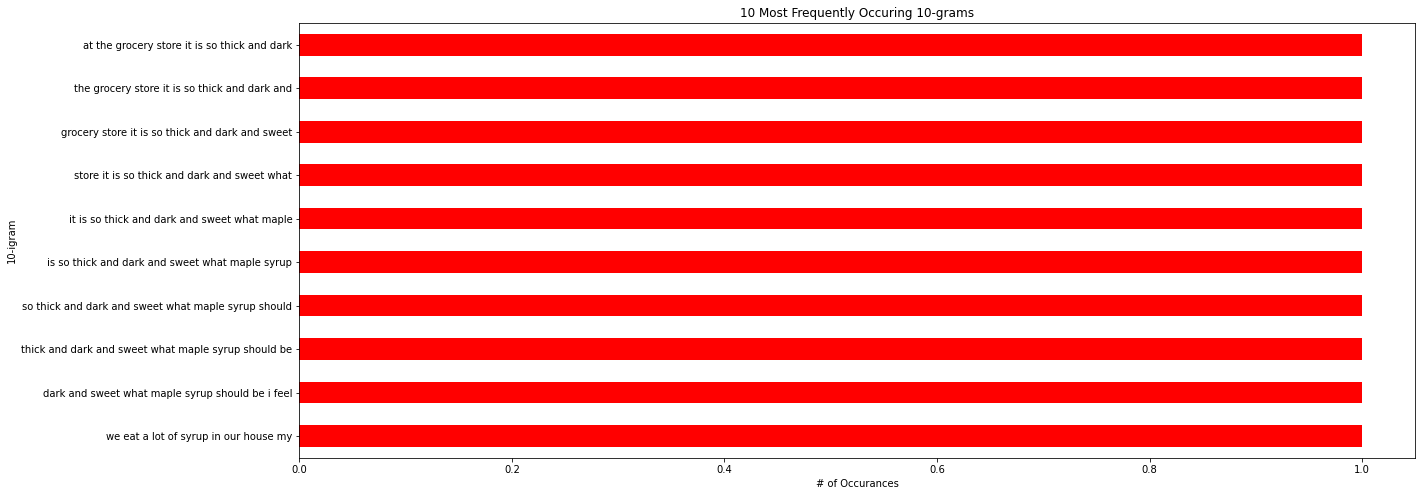

In [ ]:
from google.colab import files

# for i in range(1,11):

i=10
bigram_series = (pd.Series(get_ngrams(i)).value_counts())[:10]
bigram_series.plot.barh(color='red', figsize=(20, 8))
plt.title(f'10 Most Frequently Occuring {i}-grams')
plt.ylabel(f'{i}-igram')
plt.xlabel('# of Occurances')
# files.download(f"unigram.jpg")

**One Hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

part1 = train_unique.head(50000)
df_new = pd.get_dummies(part1, columns=["clean_reviews"])

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 54179
Columns: 49998 entries, Score to clean_reviews_zukes are great training treats because they are small and quickly consumed so you can continue what you are working on   i have shopped everywhere for them and amazon is the best price i have found so we order them frequently  best price on zukes
dtypes: int64(1), object(5), uint8(49992)
memory usage: 2.3+ GB


TF (Term Frequency) 

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
test.head()

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...


In [ ]:
X_train = train_unique['clean_reviews']
X_train.head()

0    i received this product early from the seller ...
1    numi s collection assortment melange includes ...
2    i was very careful not to overcook this pasta ...
3    buying this multi pack i was misled by the pic...
4    these bars are so good  i loved them warmed up...
Name: clean_reviews, dtype: object

In [ ]:
X_train

0         i received this product early from the seller ...
1         numi s collection assortment melange includes ...
2         i was very careful not to overcook this pasta ...
3         buying this multi pack i was misled by the pic...
4         these bars are so good  i loved them warmed up...
                                ...                        
426331    this coconut water tastes great  the first tim...
426333    being one that loves a dirty ketel one or grey...
426335    i had been buying at a store  but they had a h...
426337    i love real scottish haggis and this brand  th...
426338    we eat a lot of syrup in our house   my three ...
Name: clean_reviews, Length: 308934, dtype: object

In [ ]:
X_test=test
X_test.head()

,Review_text
0,This is a good tasting K-cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...
3,I just bought this and have used it around the...
4,great product. actually we've used it all now...


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tfidf = vectorizer.transform(X_train)

In [ ]:
X_train_tfidf

<308934x100540 sparse matrix of type '<class 'numpy.float64'>'
	with 17025589 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_tfidf.shape)

(308934, 100540)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# compute the cosine similarity matrix
cosine_sim = cosine_similarity(X_train_tfidf, X_train_tfidf)

In [ ]:
from sklearn.manifold import MDS
# compute the MDS coordinates
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

Jaccard coefficient  for tf-idf 
representation ??


In [ ]:
#Visualize TF-IDF

pos = mds.fit_transform(cosine_sim)
	
xs, ys = pos[:, 0], pos[:, 1]

# create dataframe
vistfidf_df = pd.DataFrame(dict(x=xs, y=ys, label=df['label']))

# group by label
groups = vistfidf_df.groupby('label')

# set up plot
fig, ax = plt.subplots(figsize=(15, 15))
ax.margins(0.05)

# plot each group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=10, label=name)
    ax.set_aspect('auto')
    ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    ax.tick_params(axis='y', which='both', left='off', top='off', labelleft='off')
    ax.legend(numpoints=1)

plt.show()

## Representation
Binary representation , frequency count , Tf-idf ?
• Applications like clustering & topic modelling have reported to work 
better with raw term frequencies
• Stemming or Lemmatization? Stemming useful when mining very small 
documents like discussion board posts or tweets.
Studies have shown that techniques like stemming can sometimes 
degrade classification accuracy when working with larger documents. 
[Charu C. Aggarwal. “Machine Learning for Text.”]



# Models

Naive Bayes (simple, common) –  TODAY 
• k-Nearest Neighbors (simple, powerful)
• Support-vector machines (generally more powerful)
• Logistic Regression ... plus many other methods

In [ ]:
# Function that returns a pipeline given a vectorizer, classifier and [dim_reducer] 

def makePipeline(vectorizer, classifier, dim_reducer = None):
    steps = [('vectorize', vectorizer)]
    
    if dim_reducer:
        steps.append(('dim_reduce', dim_reducer))
    
    steps.append(('classify', classifier))

    return Pipeline(steps)

Add the KNN model

In [ ]:
fields = ['Review Type', 'N-Grams', 'Vectorizer', 'Model', 'Precision', 'Recall', 'Accuracy', 'F1']
table = defaultdict(list)

# Using Stratification to make sure that proportions of classes remain the same in the training and test splits 
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=22)

for representation in ('binary', 'tf', 'tfidf', 'Lem-Stem'):
    for n_grams in (1,2,3):
        for vectorizer in (CountVectorizer(ngram_range=(n_grams,n_grams), lowercase= False), \
            TfidfVectorizer(ngram_range=(n_grams,n_grams), lowercase= False),\
                CountVectorizer(binary=True, ngram_range=(n_grams,n_grams), lowercase= False)):
                for model in (MultinomialNB(), SGDClassifier(), LogisticRegression()):
                    scores = defaultdict(list)
                    for train_idx, test_idx in cv.split(df, df['Self Polarity']):
                        
                        X_train, X_test = df[preProcessType][train_idx], df[preProcessType][test_idx]
                        y_train, y_test = df['Self Polarity'][train_idx], df['Self Polarity'][test_idx] 
                        
                        pipeline = makePipeline(vectorizer=vectorizer, classifier=model)
                        
                        pipeline.fit(X_train, y_train)
                        y_pred = pipeline.predict(X_test)

                        scores['Precision'].append(precision_score(y_test, y_pred, average=None))
                        scores['Recall'].append(recall_score(y_test, y_pred, average=None))
                        scores['F1'].append(f1_score(y_test, y_pred, average=None))
                        scores['Accuracy'].append(accuracy_score(y_test, y_pred))
                    
                    if n_grams == 1:
                        n_grams_str = 'Unigram'
                    elif n_grams == 2:
                        n_grams_str = 'Bigram'
                    else:
                        n_grams_str = 'Trigram'
                    
                    for field, value in (("Tweet Type", preProcessType), ("N-Grams", n_grams_str), \
                        ("Vectorizer", str(vectorizer)), ("Model", str(model))): 

                        table[field].append(value)

                    for field in fields[4:]:
                        table[field].append(mean(scores[field]))

# Sequence Models

So far you have investigated the document as a ‘bag of word model’. Bag of word models fail 
to take advantage of the semantic meaning present in word ordering. Experiment with a least 
one model that looks at the text as a sequence (RNN, LSTM,...). Document your results and 
compare to the bag of word representation models in steps 2-4.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np



In [ ]:
# loading the data
# train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews
0,5,I received this product early from the seller!...,i received this product early from the seller ...
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...


In [ ]:
test_df['clean_reviews'] = test_df['Review_text'].apply(data_cleanup)
test_df.head()

,Review_text,clean_reviews
0,This is a good tasting K-cup from a guy who dr...,this is a good tasting k cup from a guy who dr...
1,these are a wonderful light crunchy breadstick...,these are a wonderful light crunchy breadstick...
2,Love this product! And has anyone mentioned th...,love this product and has anyone mentioned th...
3,I just bought this and have used it around the...,i just bought this and have used it around the...
4,great product. actually we've used it all now...,great product actually we have used it all n...


In [ ]:
# apply tokenisation and stop word removal and lemma
train_unique['sequence'] = train_unique['nltk_tokens'].apply(lambda x: " ".join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_unique['sequence'].head()

0    received product early seller tastey great mid...
1    numi collection assortment melange includes he...
2    careful overcook pasta making sure take bite e...
3    buying multi pack misled picture whole hazel n...
4    bar good loved warmed definitely think great s...
Name: sequence, dtype: object

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(train_unique['sequence'])

word_index = tokenizer.word_index
train_unique['tokens'] = tokenizer.texts_to_sequences(train_unique['sequence'])

vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 92638


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
train_unique.head()

,Score,Review_text,clean_reviews,tokens,nltk_tokens,sequence
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"[222, 5, 1318, 564, 3939, 4, 1781, 39, 68, 168...","[received, product, early, seller, tastey, gre...",received product early seller tastey great mid...
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"[2020, 2275, 1527, 1967, 1105, 10, 452, 50, 24...","[numi, collection, assortment, melange, includ...",numi collection assortment melange includes he...
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"[953, 5549, 251, 241, 124, 112, 395, 100, 239,...","[careful, overcook, pasta, making, sure, take,...",careful overcook pasta making sure take bite e...
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"[147, 2154, 81, 717, 123, 229, 164, 3355, 901,...","[buying, multi, pack, misled, picture, whole, ...",buying multi pack misled picture whole hazel n...
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"[75, 2, 209, 3281, 143, 59, 4, 68, 269, 222, 5...","[bar, good, loved, warmed, definitely, think, ...",bar good loved warmed definitely think great s...


In [ ]:
max_len = 1500
padded_seq = sequence.pad_sequences(train_unique['tokens'], maxlen = max_len, padding='post')

In [ ]:
padded_seq.shape

(308934, 1500)

In [ ]:
train_df, test_df = train_test_split(train_unique, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (247147, 6)
Test data size :  (61787, 6)


In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(6000+1, embedding_vecor_length, input_length=max_len))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 1500, 32)          192032    
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 245,333
Trainable params: 245,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train.to_list())

y_train = encoder.transform(y_train.to_list())
# y_test = encoder.transform(train_unique.Score.to_list())

y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

y_train shape: (247147, 1)


In [ ]:
model.fit(x_train,y_train, epochs=5, batch_size=64, validation_split=0.3)


Epoch 1/5
1449/2704 [===============>..............] - ETA: 30:27 - loss: -187.2098 - accuracy: 0.0523

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(padded_seq, train_unique['Score'], test_size = 0.2, random_state=42)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=640)

Epoch 1/5
194/387 [==============>...............] - ETA: 17:09 - loss: -60.6654 - accuracy: 0.0921

KeyboardInterrupt: ignored

# Extra

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_unique['clean_reviews'])

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 100567


In [ ]:
VOCAB_SIZE = 100000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_unique['clean_reviews'])

In [ ]:
vocab = np.array(encoder.get_vocabulary())
len(vocab)

100000

In [ ]:
encoded_example = encoder(train_unique['clean_reviews'][0])[:3].numpy()
encoded_example

array([  3, 313,  10])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_2 (TextV  (None, None)             0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          6400000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,474,369
Trainable params: 6,474,369
No

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[0.00954798]


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_unique['clean_reviews'], train_unique['Score'], test_size = 0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(train_unique.Score.to_list())

y_train = encoder.transform(train_unique.Score.to_list())
# y_test = encoder.transform(train_unique.Score.to_list())

y_train = y_train.reshape(-1,1)
# y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

y_train shape: (308934, 1)


In [ ]:
print(train_unique.head())
print(y_train[:5])

   Score                                        Review_text  \
0      5  I received this product early from the seller!...   
1      5  *****<br />Numi's Collection Assortment Melang...   
2      5  I was very careful not to overcook this pasta,...   
3      5  Buying this multi-pack I was misled by the pic...   
4      5  These bars are so good! I loved them warmed up...   

                                       clean_reviews  \
0  i received this product early from the seller ...   
1  numi s collection assortment melange includes ...   
2  i was very careful not to overcook this pasta ...   
3  buying this multi pack i was misled by the pic...   
4  these bars are so good  i loved them warmed up...   

                                         nltk_tokens  
0  [i, received, this, product, early, from, the,...  
1  [numi, s, collection, assortment, melange, inc...  
2  [i, was, very, careful, not, to, overcook, thi...  
3  [buying, this, multi, pack, i, was, misled, by...  
4  [these

In [ ]:
history = model.fit(train_unique['clean_reviews'], y_train, epochs=10,
                    validation_split=0.2,
                    validation_steps=30)

Epoch 1/10
7724/7724 [==============================] - 2984s 386ms/step - loss: -111461.1562 - accuracy: 0.0530 - val_loss: -196635.9688 - val_accuracy: 0.0916
Epoch 2/10
1786/7724 [=====>........................] - ETA: 34:56 - loss: -140565.2656 - accuracy: 0.0543

KeyboardInterrupt: ignored

In [ ]:
test_loss, test_acc = model.evaluate(x_val, y_val)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'and', 'a', 'it', 'to', 'of', 'is',
       'this', 'not', 'for', 'in', 'my', 'that', 'have', 'but', 'you',
       'with'], dtype='<U105')

In [ ]:
max_len = 1
for text in train_df['Review_text']:
  if len(text.split(" ")) > max_len:
    max_len = len(text.split(" "))
print("Maximum length of the review is", max_len, "words")

Maximum length of the review is 3545 words


In [ ]:
from keras.preprocessing.sequence import pad_sequences

MAX_SEQUENCE_LENGTH = max_len
x_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Review_text']),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_df['Review_text']),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (426340, 3545)
Testing X Shape: (142114, 3545)


# Part 5: Topic Modelling

## Topic Model Visualization using pyLDAvis

pyLDAvis is an open-source python library that helps in analyzing and creating highly interactive visualization of the clusters created by LDA.  
Check this document on pyLADvis https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6
Below we generate the inteactrive visualizations for 10 topics and 100 topics for our movie review data set

In [2]:
# Importing necessary packages for performing topic modelling using pyLDAvis
from sklearn.feature_extraction.text import CountVectorizer
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# !pip install mglearn
%matplotlib inline
import mglearn as mglearn
import matplotlib as plt

D:\anaconda3\envs\DMML\lib\site-packages\mglearn\plot_pca.py:7: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='cache'", use "location='cache'" instead.
  memory = Memory(cachedir="cache")
D:\anaconda3\envs\DMML\lib\site-packages\mglearn\plot_nmf.py:7: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='cache'", use "location='cache'" instead.
  memory = Memory(cachedir="cache")


In [3]:
train_preprocessed_df = pd.read_csv('./content/train_cleaned.csv')

# Calling count vectorizer as the main model on the preprocessed_df to use in pyLDAvis
vect = CountVectorizer()

# Fitting and transforming the lemmatized text since it doesn't change the word. Using the stemming or lem-stem (combination) text would be insignificant since there 
# would be no words with the correct spelling and it would cause confusion when we wish to visualize the multiple topics.
X = vect.fit_transform(train_preprocessed_df["nltk_tokens"].apply(lambda x: x.lower()))

# Using LDA for performing topic modelling on our lemmatized data
from sklearn.decomposition import LatentDirichletAllocation

# We use LDA for 9 topics since we have used 9 different topics as our main data topics (Expo related).
lda = LatentDirichletAllocation(n_components=9, learning_method="batch",max_iter=25, random_state=0)

# Fitting and transforming the count vectorized text onto the LDA for topic modelling
document_topics = lda.fit_transform(X)

#  The LDA components store (n topics, n words)
print("lda.components_.shape: {}".format(lda.components_.shape))

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names_out())
#prints the most important words for each topic

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(9), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Q1 Can you interpret each of the topics below?
pyLDAvis.sklearn.prepare(lda, X,vect) # visualization for 9 topics

lda.components_.shape: (9, 92612)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
product       tea           sauce         would         taste         
use           flavor        like          one           like          
oil           green         good          box           drink         
organic       taste         taste         bag           flavor        
ingredient    like          flavor        product       water         
hair          hot           make          like          sugar         
using         good          great         package       good          
also          love          use           good          bottle        
used          one           salt          get           would         
work          bag           add           review        one           


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------     

D:\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\DMML\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.068297  0.024848       1        1  15.558031
3      0.136469 -0.022292       2        1  14.346838
2     -0.073339  0.032961       3        1  13.401748
7      0.154099 -0.200308       4        1  12.277771
6      0.105431  0.072086       5        1  11.025704
4     -0.065738  0.053603       6        1  10.412784
0      0.096318  0.168601       7        1   8.384884
8     -0.125711 -0.086876       8        1   7.805106
1     -0.159232 -0.042623       9        1   6.787134, topic_info=           Term          Freq         Total Category  logprob  loglift
80889       tea  92649.000000  92649.000000  Default  30.0000  30.0000
16100    coffee  95870.000000  95870.000000  Default  29.0000  29.0000
24007       dog  53417.000000  53417.000000  Default  28.0000  28.0000
31308      food  73604.000000  73604.000000  Default  27.0000  27.0000
2720     amazon  50665.000000  50665.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
29598  favorite   4125.654363  28070.365721   Topic9  -5.3689   0.7727
7785       best   4872.936248  59882.428355   Topic9  -5.2025   0.1815
54676      nice   3966.180693  26406.787998   Topic9  -5.4084   0.7943
66243    really   4269.510044  57032.198828   Topic9  -5.3347   0.0980
83860     tried   3801.580657  40717.990714   Topic9  -5.4507   0.3189

[734 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
636        3  0.000256   acid
636        6  0.087895   acid
636        7  0.728782   acid
636        8  0.181683   acid
636        9  0.001281   acid
...      ...       ...    ...
91530      9  0.044043   year
91760      9  0.998321   yogi
92376      6  0.997806  zevia
92394      6  0.998654   zico
92417      7  0.998106   zinc

[1956 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 3, 8, 7, 5, 1, 9, 2])

## Insights For All Kinds of Reviews

- Topic 1: Snacks (cereal, food containing sugar, etc. )
- Topic 2: Orders and Packaging (package, received, product, etc.)
- Topic 3: Food Ingredients (Garlic, pepper, meat, cheese, etc.)
- Topic 4: Amazon services 
- Topic 5: Pets and their commodities
- Topic 6: Drinks
- Topic 7: Hair Products (Kinda weird for a food dataset)
- Topic 8: Coffee products
- Topic 9: Tea products

In [4]:
# Creating separate dataframes for 1 star and 5 star reviews
train_1star = train_preprocessed_df[train_preprocessed_df['Score'] == 1]
train_5star = train_preprocessed_df[train_preprocessed_df['Score'] == 5]

In [5]:
train_1star.head()

,Score,Review_text,clean_reviews,nltk_tokens,snowball_tokens,porter_tokens
18,1,This is the first coffee I tried when I got my...,this is the first coffee i tried when i got my...,"['first', 'coffee', 'tried', 'got', 'keurig', ...","['first', 'coffe', 'tri', 'got', 'keurig', 'di...","['first', 'coffe', 'tri', 'got', 'keurig', 'di..."
31,1,Don't buy these. I have a very large German S...,do not buy these i have a very large german ...,"['buy', 'large', 'german', 'shepherd', 'cut', ...","['buy', 'larg', 'german', 'shepherd', 'cut', '...","['buy', 'larg', 'german', 'shepherd', 'cut', '..."
49,1,I wanted a sugar splurge but I chose these Sho...,i wanted a sugar splurge but i chose these sho...,"['wanted', 'sugar', 'splurge', 'chose', 'short...","['want', 'sugar', 'splurg', 'chose', 'shortbre...","['want', 'sugar', 'splurg', 'chose', 'shortbre..."
55,1,"As a Chinese myself, I never brought any produ...",as a chinese myself i never brought any produ...,"['chinese', 'never', 'brought', 'product', 'lo...","['chines', 'never', 'brought', 'product', 'low...","['chines', 'never', 'brought', 'product', 'low..."
56,1,This is nearly twice as expensive as the cost ...,this is nearly twice as expensive as the cost ...,"['nearly', 'twice', 'expensive', 'cost', 'nesp...","['near', 'twice', 'expens', 'cost', 'nespresso...","['nearli', 'twice', 'expens', 'cost', 'nespres..."


In [6]:
train_1star = train_1star.reset_index(drop=True)
train_5star = train_5star.reset_index(drop=True)

In [7]:
train_5star.head()

,Score,Review_text,clean_reviews,nltk_tokens,snowball_tokens,porter_tokens
0,5,I received this product early from the seller!...,i received this product early from the seller ...,"['received', 'product', 'early', 'seller', 'ta...","['receiv', 'product', 'earli', 'seller', 'tast...","['receiv', 'product', 'earli', 'seller', 'tast..."
1,5,*****<br />Numi's Collection Assortment Melang...,numi collection assortment melange includes ...,"['numi', 'collection', 'assortment', 'melange'...","['numi', 'collect', 'assort', 'melang', 'inclu...","['numi', 'collect', 'assort', 'melang', 'inclu..."
2,5,"I was very careful not to overcook this pasta,...",i was very careful not to overcook this pasta ...,"['careful', 'overcook', 'pasta', 'making', 'su...","['care', 'overcook', 'pasta', 'make', 'sure', ...","['care', 'overcook', 'pasta', 'make', 'sure', ..."
3,5,Buying this multi-pack I was misled by the pic...,buying this multi pack i was misled by the pic...,"['buying', 'multi', 'pack', 'misled', 'picture...","['buy', 'multi', 'pack', 'misl', 'pictur', 'wh...","['buy', 'multi', 'pack', 'misl', 'pictur', 'wh..."
4,5,These bars are so good! I loved them warmed up...,these bars are so good i loved them warmed up...,"['bar', 'good', 'loved', 'warmed', 'definitely...","['bar', 'good', 'love', 'warm', 'definit', 'th...","['bar', 'good', 'love', 'warm', 'definit', 'th..."


# TODO Highlight the similarities and dissimilarities between the reviews at the end

## Visualiaztion for 1 star reviews

In [10]:
# Calling count vectorizer as the main model on the preprocessed_df to use in pyLDAvis
vect = CountVectorizer()

# Fitting and transforming the lemmatized text since it doesn't change the word. Using the stemming or lem-stem (combination) text would be insignificant since there 
# would be no words with the correct spelling and it would cause confusion when we wish to visualize the multiple topics.
X = vect.fit_transform(train_1star["nltk_tokens"].apply(lambda x: x.lower()))

# Using LDA for performing topic modelling on our lemmatized data
from sklearn.decomposition import LatentDirichletAllocation

# We use LDA for 9 topics since we have used 9 different topics as our main data topics (Expo related).
lda = LatentDirichletAllocation(n_components=9, learning_method="batch",max_iter=25, random_state=0)

# Fitting and transforming the count vectorized text onto the LDA for topic modelling
document_topics = lda.fit_transform(X)

#  The LDA components store (n topics, n words)
print("lda.components_.shape: {}".format(lda.components_.shape))

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names_out())
#prints the most important words for each topic

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(9), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Q1 Can you interpret each of the topics below?
pyLDAvis.sklearn.prepare(lda, X,vect) # visualization for 9 topics

lda.components_.shape: (9, 29818)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
oil           chocolate     food          tea           taste         
water         bar           cat           taste         like          
product       candy         ingredient    sugar         would         
coconut       taste         product       flavor        one           
organic       product       eat           like          flavor        
baby          peanut        corn          drink         good          
formula       cooky         would         product       even          
milk          like          dog           ingredient    bad           
popcorn       butter        fat           green         tried         
food          chip          high          juice         really        


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------     

C:\Users\Admin\anaconda3\envs\textanalytics\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Admin\anaconda3\envs\textanalytics\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.114096 -0.015647       1        1  21.097564
5     -0.027124  0.147641       2        1  18.406580
3      0.097765 -0.110365       3        1  10.349751
8      0.001532  0.196470       4        1   9.418913
2     -0.146686 -0.066055       5        1   9.200413
6      0.129368 -0.011919       6        1   9.007186
7     -0.125070  0.043486       7        1   8.840309
1      0.116899 -0.057445       8        1   7.015415
0     -0.160781 -0.126166       9        1   6.663869, topic_info=         Term          Freq         Total Category  logprob  loglift
4964   coffee   7296.000000   7296.000000  Default  30.0000  30.0000
26123     tea   5361.000000   5361.000000  Default  29.0000  29.0000
7775      dog   5351.000000   5351.000000  Default  28.0000  28.0000
26056   taste  13977.000000  13977.000000  Default  27.0000  27.0000
10198    food   7276.000000   7276.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
3105    brand    302.926366   2920.854410   Topic9  -5.6017   0.4423
14414    know    288.604160   3305.582166   Topic9  -5.6501   0.2702
15482    made    277.423309   3936.339354   Topic9  -5.6896   0.0560
26631    time    254.644665   4869.240190   Topic9  -5.7753  -0.2424
18033     one    260.179263  10245.410805   Topic9  -5.7538  -0.9647

[667 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
111        3  0.986039   acai
272        3  0.050235     ad
272        4  0.947298     ad
290        1  0.241433  added
290        3  0.496341  added
...      ...       ...    ...
29685      1  0.864744   yuck
29685      3  0.056633   yuck
29685      6  0.042475   yuck
29685      8  0.034851   yuck
29761      9  0.992100   zico

[1678 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 4, 9, 3, 7, 8, 2, 1])

# Insights
- Topic 1: Food review adjectives (Mostly negative)
- Topic 2: Services and Packaging
- Topic 3: Drink and Drink Ingredients
- Topic 4: Grocery Stuff
- Topic 5: Food and Food Ingredients
- Topic 6: Coffee Ingredients
- Topic 7: Pet Food (Adjectivifying negative pet food)
- Topic 8: Chocolate and Chocolate Ingredients
- Topic 9: Mixed Food Ingredients

1 star reviews had lots of negative words 

## Visualiaztion for 5 star reviews

In [37]:
# Calling count vectorizer as the main model on the preprocessed_df to use in pyLDAvis
vect = CountVectorizer()

# Fitting and transforming the lemmatized text since it doesn't change the word. Using the stemming or lem-stem (combination) text would be insignificant since there 
# would be no words with the correct spelling and it would cause confusion when we wish to visualize the multiple topics.
X = vect.fit_transform(train_5star["nltk_tokens"].apply(lambda x: x.lower()))

# Using LDA for performing topic modelling on our lemmatized data
from sklearn.decomposition import LatentDirichletAllocation

# We use LDA for 9 topics since we have used 9 different topics as our main data topics (Expo related).
lda = LatentDirichletAllocation(n_components=9, learning_method="batch",max_iter=25, random_state=0)

# Fitting and transforming the count vectorized text onto the LDA for topic modelling
document_topics = lda.fit_transform(X)

#  The LDA components store (n topics, n words)
print("lda.components_.shape: {}".format(lda.components_.shape))

# for each topic (a row in the components_), sort the features (ascending).
# Invert rows with [:, ::-1] to make sorting descending

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

# get the feature names from the vectorizer:
feature_names = np.array(vect.get_feature_names_out())
#prints the most important words for each topic

# Print out the 10 topics:
mglearn.tools.print_topics(topics=range(9), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)
# Q1 Can you interpret each of the topics below?
pyLDAvis.sklearn.prepare(lda, X,vect) # visualization for 9 topics

lda.components_.shape: (9, 72115)
topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
coffee        amazon        bar           dog           tea           
cup           price         taste         food          flavor        
flavor        store         like          cat           drink         
like          product       chocolate     love          taste         
great         great         good          treat         like          
taste         find          chip          one           green         
good          buy           butter        like          good          
one           good          calorie       great         great         
best          order         peanut        get           love          
love          love          free          would         one           


topic 5       topic 6       topic 7       topic 8       
--------      --------      --------      --------     

D:\anaconda3\envs\DMML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
D:\anaconda3\envs\DMML\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.224186 -0.090047       1        1  13.747278
5     -0.047004  0.086995       2        1  13.095013
6      0.084543  0.020178       3        1  12.942624
3     -0.086882  0.146963       4        1  11.645515
7     -0.055683 -0.037561       5        1  10.481249
2      0.108780  0.084153       6        1  10.325872
4      0.115676 -0.077278       7        1  10.063586
8      0.050146  0.012722       8        1   9.462541
0      0.054610 -0.146126       9        1   8.236324, topic_info=         Term          Freq         Total Category  logprob  loglift
63067     tea  61478.000000  61478.000000  Default  30.0000  30.0000
12467  coffee  56014.000000  56014.000000  Default  29.0000  29.0000
18649     dog  33013.000000  33013.000000  Default  28.0000  28.0000
2100   amazon  34079.000000  34079.000000  Default  27.0000  27.0000
24333    food  46987.000000  46987.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
65408   tried   4134.148053  26057.927420   Topic9  -5.0431   0.6556
19184   drink   3741.000950  20988.200348   Topic9  -5.1431   0.7720
38054    make   4393.869500  41187.651165   Topic9  -4.9822   0.2587
51642  really   3162.497374  33174.852656   Topic9  -5.3111   0.1462
70724   would   2881.235749  40176.895080   Topic9  -5.4042  -0.1385

[711 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
533        2  0.997913        acne
657        2  0.154140         add
657        3  0.447172         add
657        4  0.008366         add
657        5  0.000653         add
...      ...       ...         ...
71713      7  0.028797       yummy
71713      8  0.459575       yummy
71713      9  0.023230       yummy
71714      8  0.986512  yummyearth
71952      2  0.998377        zico

[1798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 7, 4, 8, 3, 5, 9, 1])

# Insights
- Topic 1: Orders and Packaging
- Topic 2: Toiletries
- Topic 3: Food Ingredients
- Topic 4: Animal Related Reviews 
- Topic 5: Sweets
- Topic 6: Chocolate and Other Ingredients 
- Topic 7: Drinks
- Topic 8: Food for Kids
- Topic 9: Coffee and Ingredients

5 star reviews had lots of positive words

## Scatter Text

Send HELP!!!!

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import scattertext as st

train_preprocessed_df['scatter_text'] = train_preprocessed_df['Review_text'].apply(st.whitespace_nlp_with_sentences)
corpus = st.CorpusFromParsedDocuments(
    train_preprocessed_df, category_col='Score', parsed_col='scatter_text'
).build().get_unigram_corpus().compact(st.AssociationCompactor(2000))
html = st.produce_scattertext_explorer(
    corpus,
    category='review', category_name='review',
    minimum_term_frequency=4,  pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    transform=st.Scalers.dense_rank
)
open('./expo2020visualisation.html', 'w').write(html)


In [39]:
document_topics.shape

(196676, 9)